In [2]:
import numpy as np

eps_N = -3
eps_G = -4
eps_A = -1
eps_NA = -1

eps_G_max = eps_N - np.log((1+np.exp(-eps_A)+np.exp(-eps_A-eps_NA))/(1+np.exp(-eps_A)))
eps_G_max2 = eps_N - np.log(np.exp(-eps_NA)-1)
print(-eps_N, -eps_G_max, -eps_G_max2)

3 4.094344276926158 3.541324854612918


0.26401558741392617 0.2640155874139923


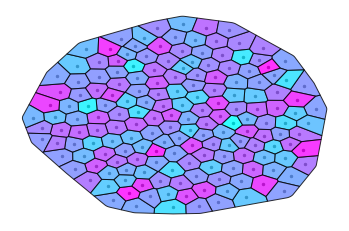

In [6]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh

Pos = np.array(pd.read_csv('testOrganoid.csv'))
FVmesh = initializeFVmesh(Pos)

def connectivity(FVmesh):
    X = np.zeros([FVmesh.nofCells, FVmesh.nofCells])

    for i in range(FVmesh.nofCells):
        for j in FVmesh.Neigh[i]:
            X[i,j] += 1/len(FVmesh.Neigh[i])
 
    return X


X = connectivity(FVmesh)
eta_n = np.exp(3)
eta_g = np.exp(4)
eta_a = np.exp(1)
eta_na = np.exp(1)

A = np.eye(FVmesh.nofCells) + eta_a*X
b = np.dot(X, np.ones(FVmesh.nofCells))*(1-1/eta_g)

a = np.linalg.solve(A, b)
g = np.linalg.solve(X, a)

print(min(g), max(g))
FVmesh.plot(g)

In [9]:
from sympy import *
x, a = symbols('x, a')

p = x*a/(1+(x)*a)
integrate(p, a)

x*(a/x - log(a*x + 1)/x**2)

2.718281828459045


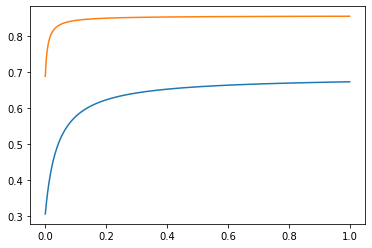

In [62]:
import numpy as np
import matplotlib.pyplot as plt

eta_a = np.exp(4)
eta_b = np.exp(3)
eta_c = np.exp(2)
eta = np.exp(1)

b = 0.2
c = 0.3
a = np.linspace(0,1,1000)

eta2 = eta#1/(eta_a*a)*((1+eta_a*a)**2/(1+eta_b*b + eta_a*a) - 1)  #np.exp(-3)
print(eta2)

p_C1 = eta_c*c*(1+eta_a*a)/(1 + eta_c*c*(1+eta_a*a) + eta_b*b + eta_a*a)
p_C2 = eta_c*c*(1+eta_a*eta2*a)/(1 + eta_c*c*(1+eta_a*eta2*a) + eta_a*a)
#p_C3 = eta_c*c/(1 + eta_c*c)

plt.plot(a, p_C1)
plt.plot(a, p_C2)
#plt.plot(c, p_C3, 'k--')

False


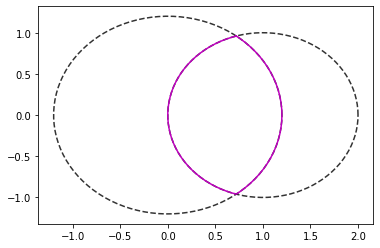

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

TE1 = lambda theta: 1.2*np.array([1*np.cos(theta),1*np.sin(theta)]).T
TE2 = lambda theta: np.array([1*np.cos(theta) + 1,1*np.sin(theta)]).T

TEvals1 = TE1(np.linspace(0,2*np.pi, 100))
TEpoly1 = Polygon(TEvals1)

TEvals2 = TE2(np.linspace(0,2*np.pi, 100))
TEpoly2 = Polygon(TEvals2)

poly = TEpoly1.intersection(TEpoly2)
print(poly.is_empty)


x,y = TEpoly1.exterior.xy
plt.plot(x,y, 'k--', alpha = 0.8)

x,y = TEpoly2.exterior.xy
plt.plot(x,y, 'k--', alpha = 0.8)

x,y = poly.exterior.xy
plt.plot(x,y, 'm')

In [29]:
from scipy.spatial.distance import cdist

a = np.random.rand(6)

print(a, np.maximum(a, 1))

[0.51356955 0.9835461  0.15751447 0.63753187 0.30684477 0.88062042] [1. 1. 1. 1. 1. 1.]


In [70]:
a=np.linspace(0,100,5)
np.tile(a,(2,1)).T

array([[  0.,   0.],
       [ 25.,  25.],
       [ 50.,  50.],
       [ 75.,  75.],
       [100., 100.]])

2.8196303598247283 1.1549233506342313


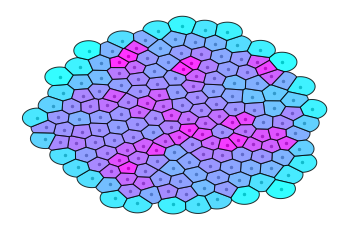

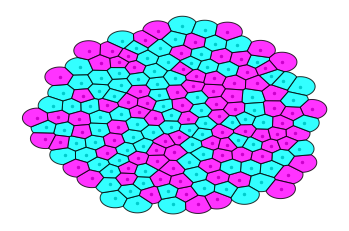

In [170]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh
import matplotlib.pyplot as plt

Pos = np.array(pd.read_csv('testOrganoid.csv'))
Radius = np.ones(len(Pos))*1.1
FVmesh = initializeFVmesh(Pos, Radius=Radius)
p = np.pi*Radius**2/FVmesh.Vol

plt.figure()
FVmesh.plot(p)
print(max(p),min(p))

def dxx(a,b,FVmesh):
    val = np.zeros(FVmesh.nofCells)
    for i in range(FVmesh.nofCells):
        for j in FVmesh.Neigh[i]:
            val[i] += 1/FVmesh.Vol[i]/FVmesh.Dist[i,j]/2*(b[i]+b[j])*(a[j]-a[i])
    return val

eq = lambda s: dxx(p,s,FVmesh)


from Functions import Eq2Mat
A = Eq2Mat(eq, FVmesh.nofCells)

b = np.ones(len(p))
for i in range(len(b)):
    if i%2 == 0:
        b[i] = 0

plt.figure()
FVmesh.plot(b)

[[1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 1.]]
[ 0.  0.  0.  0. -0.  0.]


C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


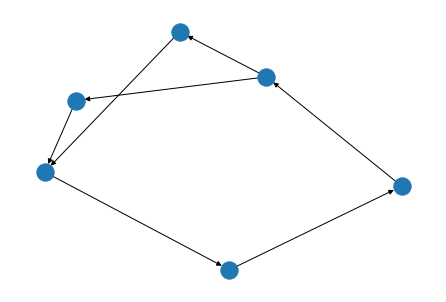

In [32]:
import networkx as nx
import numpy as np

H = np.array([[0,0],[1,2],[1,1],[2,-1]])
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3,4,5])
G.add_edges_from([(0,1),(1,2),(1,3),(2,4),(3,4),(4,5),(5,0)])
nx.draw(G)
b = np.zeros(6)
A = nx.to_numpy_matrix(G)+np.eye(6)
print(A)
p = np.linalg.solve(A,b)
print(p)

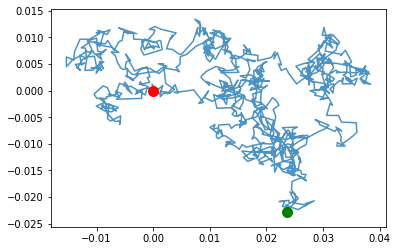

In [115]:
import numpy as np
import matplotlib.pyplot as plt

T = 1
N = 1000
t = np.linspace(0,T,N)

v = 1
x = np.empty([len(t),2])
x[0] = [0,0]
for i in range(N-1):
    x[i+1] = x[i] + v*np.random.normal(0,t[i+1]-t[i],2)
    
plt.plot(x[:,0],x[:,1], alpha = 0.8)
plt.plot(x[0,0],x[0,1], 'ro', ms = 10)
plt.plot(x[-1,0],x[-1,1], 'go', ms = 10)

In [8]:
np.random.normal(0,1,2)

array([-1.28031726,  0.34895574])